# Part 1 USD - INR PREDICTION MODEL


Predict USD values for a given year using the data from "/content/EXINUS.csv". Preprocess the data https://fred.stlouisfed.org/series/EXINUS

## Load data

### Subtask:
Load the USD to INR exchange rate data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the CSV file into a pandas DataFrame to begin the analysis as requested by the subtask instructions. Displaying the head and info will help verify the data was loaded correctly and understand its structure.



In [377]:
import pandas as pd

df = pd.read_csv('EXINUS.csv')
display(df.head())
display(df.info())

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  632 non-null    object 
 1   EXINUS            632 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.0+ KB


None

**Reasoning**:
The previous command failed because the file was not found. I need to check the available files to see if the file exists or if the path is incorrect.



In [378]:
import os
print(os.listdir())

['.config', 'EXINUS.csv', '.ipynb_checkpoints', 'sample_data']


**Reasoning**:
The output of the previous command shows that the file name is `EXINUS.csv` and not `USD_INR_Exchange_Rate_Annual.csv`. I will now try to load the data using the correct file name.



In [379]:
df = pd.read_csv('EXINUS.csv')
display(df.head(15))
display(df.info())

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927
5,1973-06-01,7.2719
6,1973-07-01,7.3510
7,1973-08-01,7.5643
8,1973-09-01,7.7000
9,1973-10-01,7.7271


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  632 non-null    object 
 1   EXINUS            632 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.0+ KB


None

## Prepare data


Select the 'Year' as the feature (X) and 'EXINUS' as the target (y).


**Reasoning**:
Convert 'observation_date' to datetime, extract the year, and select the feature and target variables, reshaping the feature variable.



In [380]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['Year'] = df['observation_date'].dt.year
X = df[['Year']].values
y = df['EXINUS'].values
display(X[:5])
display(y[:5])

array([[1973],
       [1973],
       [1973],
       [1973],
       [1973]], dtype=int32)

array([8.0041, 7.7538, 7.5465, 7.5462, 7.4927])

## Make predictions


## Define model



In [381]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [382]:
# Ensure the model is trained on the full dataset before making predictions
# The model variable is defined in a previous cell as LinearRegression
model.fit(X, y) # Uncomment and run this cell if you haven't trained the model on the full dataset after cross-validation

def predict_exchange_rate(year):
  """Predicts the EXINUS exchange rate for a given year."""
  # The model expects a 2D array, so reshape the input year
  predicted_value = model.predict([[year]])
  return predicted_value[0]

# Example usage: Predict the exchange rate for the given year
year_to_predict = 2025
predicted_rate = predict_exchange_rate(year_to_predict)
print(f"Predicted EXINUS rate for {year_to_predict}: {predicted_rate:.2f}")

Predicted EXINUS rate for 2025: 78.21


## Perform k-fold cross-validation


Apply K-Fold cross-validation to the data and model, using an appropriate scoring metric (like negative mean squared error to evaluate prediction accuracy).


In [383]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores # Convert negative MSE to positive MSE

## Visualize results



Bar plot to visualize the MSE scores for each fold to understand the distribution of errors across the different splits.



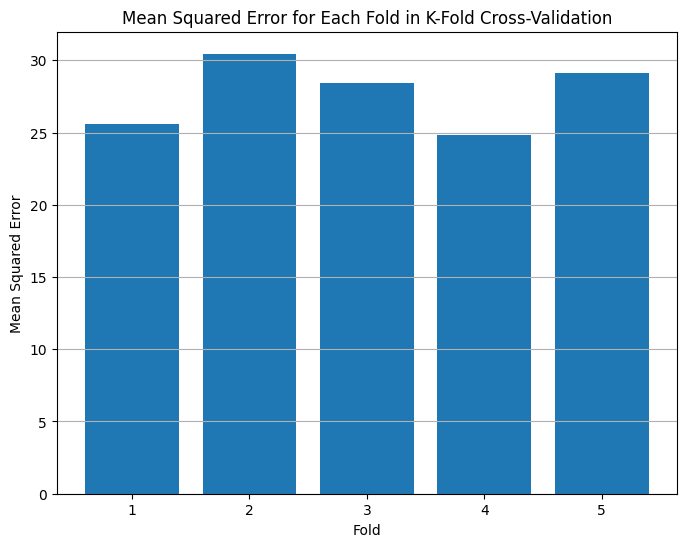

In [384]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(mse_scores) + 1), mse_scores)
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Each Fold in K-Fold Cross-Validation')
plt.xticks(range(1, len(mse_scores) + 1))
plt.grid(axis='y')
plt.show()

## Find Minimum MSE from K-Fold Cross-Validation


**Reasoning**:
To show the minimum MSE from the k-fold cross-validation, we will find the minimum value in the `mse_scores` array and print it.

In [385]:
import numpy as np

min_mse_kfold = np.min(mse_scores)
max_mse_kfold = np.max(mse_scores)
mean_mse_kfold = np.mean(mse_scores)
print(f"Minimum Mean Squared Error from K-Fold Cross-Validation: {max_mse_kfold:.2f}")
print(f"Minimum Mean Squared Error from K-Fold Cross-Validation: {min_mse_kfold:.2f}")
print(f"Average Mean Squared Error from K-Fold Cross-Validation: {mean_mse_kfold:.2f}")

# Calculate the percentage decrease in MSE from the average to the minimum
if mean_mse_kfold != 0:
    percentage_decrease_mse = ((mean_mse_kfold - min_mse_kfold) / mean_mse_kfold) * 100
    print(f"Percentage decrease in MSE from average to minimum: {percentage_decrease_mse:.2f}%")
else:
    print("Cannot calculate percentage decrease as the average MSE is zero.")

Minimum Mean Squared Error from K-Fold Cross-Validation: 30.45
Minimum Mean Squared Error from K-Fold Cross-Validation: 24.83
Average Mean Squared Error from K-Fold Cross-Validation: 27.69
Percentage decrease in MSE from average to minimum: 10.32%


## Visualize linear regression


In [386]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (505, 1)
Shape of X_test: (127, 1)
Shape of y_train: (505,)
Shape of y_test: (127,)


## Visualize Polynomial Regression (Degrees 1 to 5)



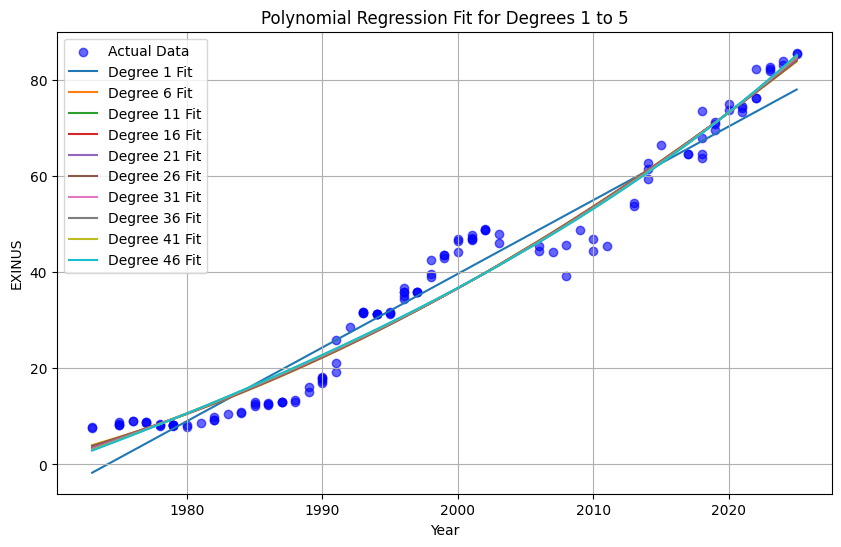

In [387]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

plt.figure(figsize=(10, 6))
# Sort the test data for plotting smooth lines
sort_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sort_indices]
y_test_sorted = y_test[sort_indices] # Sort y_test as well

plt.scatter(X_test_sorted, y_test_sorted, label='Actual Data', color='blue', alpha=0.6)

# Plot lines with increasing zorder so that later degrees are drawn on top
for degree in range(1, 50,5):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_sorted)
    plt.plot(X_test_sorted, y_pred, label=f'Degree {degree} Fit', zorder=degree)

plt.xlabel('Year')
plt.ylabel('EXINUS')
plt.title('Polynomial Regression Fit for Degrees 1 to 5')
plt.legend()
plt.grid(True)
plt.show()

## Calculate MSE for Polynomial Degrees and Find Best Degree



Determine the best polynomial degree for our model, we will calculate the Mean Squared Error (MSE) for degrees 1 through 4 on the test data. A lower MSE indicates a better fit. We will store these results in a table for easy comparison and then identify the degree that yielded the minimum MSE.

In [388]:
from sklearn.metrics import mean_squared_error
import pandas as pd

mse_results = {}
# Calculate MSE for polynomial degrees 1 through 10
for degree in range(1, 11):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[degree] = mse

# Create a pandas DataFrame from the results
mse_df = pd.DataFrame(list(mse_results.items()), columns=['Degree', 'MSE'])

# Find the degree with the minimum MSE
min_mse_degree = mse_df.loc[mse_df['MSE'].idxmin()]

print("Mean Squared Error for different Polynomial Degrees:")
display(mse_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))

print(f"\nPolynomial Degree with the minimum MSE:")
# Modify the index of the min_mse_degree Series before displaying
min_mse_degree_display = min_mse_degree.rename(index={'Degree': 'Degree'})
display(min_mse_degree_display)

Mean Squared Error for different Polynomial Degrees:


,Degree,MSE
0,1,25.618658
1,2,22.681071
2,3,22.605572
3,4,22.616905
4,5,22.627977
5,6,22.638774
6,7,22.649287
7,8,22.659504
8,9,22.669414
9,10,22.679006



Polynomial Degree with the minimum MSE:


,2
Degree,3.000000
MSE,22.605572


## Train and Predict with Polynomial Regression (Degree 3)



In [389]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Build and train the polynomial regression model with degree 3 on the full dataset
poly_model_degree_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model_degree_3.fit(X, y)

def predict_exchange_rate_poly(year):
  """Predicts the EXINUS exchange rate for a given year using the degree 3 polynomial model."""
  # The model expects a 2D array, so reshape the input year
  predicted_value = poly_model_degree_3.predict([[year]])
  return predicted_value[0]

# Example usage: Predict the exchange rate for the year 2025
year_to_predict = 2025
predicted_rate_poly = predict_exchange_rate_poly(year_to_predict)
print(f"Predicted EXINUS rate for {year_to_predict} using Polynomial Regression (Degree 3): {predicted_rate_poly:.2f}")

Predicted EXINUS rate for 2025 using Polynomial Regression (Degree 3): 83.29


# Part 2: Classification Basics

This section will cover fundamental classification concepts

### Example 1: Binary Classification - Air Quality

This example demonstrates binary classification using a simple dataset where we classify air quality as either 'Good' or 'Poor' based on a single feature: 'Pollution Level'.

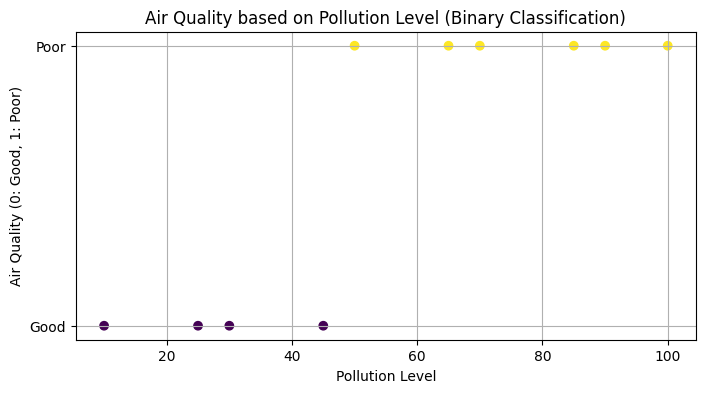

In [390]:
import numpy as np
import matplotlib.pyplot as plt

#Pollution levels and corresponding air quality (0 for Good, 1 for Poor)
pollution_levels = np.array([10, 25, 30, 45, 50, 65, 70, 85, 90, 100])
air_quality = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 0: Good, 1: Poor

# Visualize the data
plt.figure(figsize=(8, 4))
plt.scatter(pollution_levels, air_quality, c=air_quality, cmap='viridis')
plt.xlabel('Pollution Level')
plt.ylabel('Air Quality (0: Good, 1: Poor)')
plt.title('Air Quality based on Pollution Level (Binary Classification)')
plt.yticks([0, 1], ['Good', 'Poor'])
plt.grid(True)
plt.show()

This code creates a simple dataset for binary classification, where air quality is classified as good or poor based on pollution levels. The scatter plot visually represents this relationship, showing how higher pollution levels correspond to poor air quality.

### Example 2: Linear vs. Non-Linear Classifiers

This example visualizes how a linear classifier might struggle with non-linearly separable data, using a simple dataset with two features.

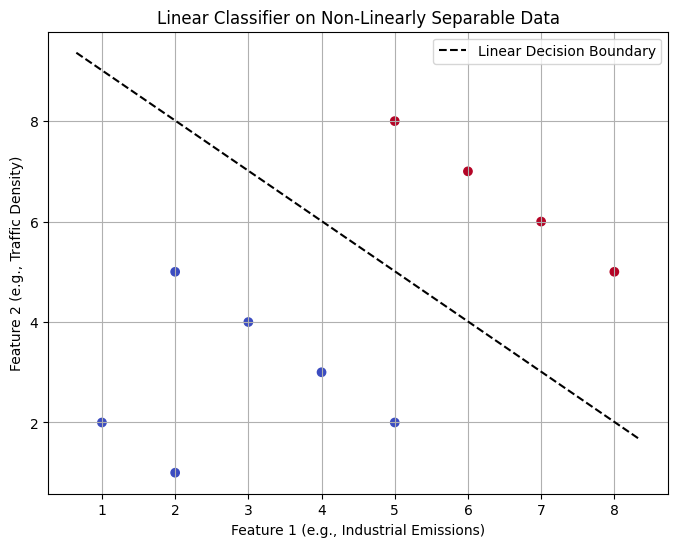

In [399]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Invented data: Two features (e.g., industrial emissions, traffic density) and pollution level (0: Low, 1: High)
X = np.array([[1, 2], [2, 1], [3, 4], [4, 3], [5, 2], [2, 5], [6, 7], [7, 6], [8, 5], [5, 8]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) # 0: Low Pollution, 1: High Pollution

# Train a linear classifier (Logistic Regression)
model = LogisticRegression()
model.fit(X, y)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Plot the decision boundary (simplified for visualization)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = -(model.intercept_[0] + model.coef_[0][0] * x_vals) / model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c='black', label='Linear Decision Boundary')


plt.xlabel('Feature 1 (e.g., Industrial Emissions)')
plt.ylabel('Feature 2 (e.g., Traffic Density)')
plt.title('Linear Classifier on Non-Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

This code generates data that is not linearly separable and trains a linear classifier (Logistic Regression) on it. The plot shows the data points and the straight line decision boundary learned by the linear model, illustrating its limitation in separating the classes effectively.

### Example 3: K-Nearest Neighbors (KNN)

This example demonstrates the KNN algorithm for classifying pollution levels based on two features, showing how it uses nearest neighbors to make predictions.

Predicted pollution level for point [9 9]: Moderate Pollution


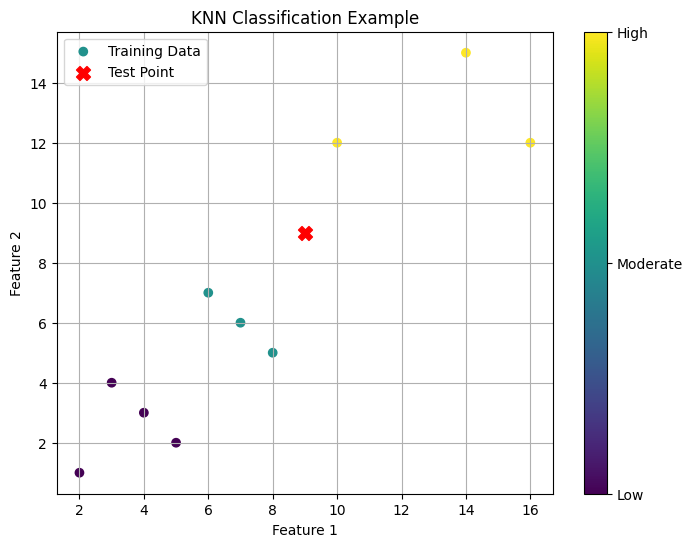

In [392]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Invented data: Two features and pollution level (0: Low, 1: Moderate, 2: High)
X = np.array([[1, 2], [2, 1], [3, 4], [4, 3], [5, 2], [2, 5], [6, 7], [7, 6], [8, 5], [5, 8],
              [10, 12], [12, 10], [14, 15], [15, 14], [16, 12]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]) # 0: Low, 1: Moderate, 2: High

# Split data for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train a KNN classifier (e.g., with k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on a test point (example)
test_point = np.array([[9, 9]])
test_point_scaled = scaler.transform(test_point)
prediction = knn.predict(test_point_scaled)

pollution_levels = {0: 'Low Pollution', 1: 'Moderate Pollution', 2: 'High Pollution'}
print(f"Predicted pollution level for point {test_point[0]}: {pollution_levels[prediction[0]]}")

# Visualize the data and test point
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(test_point[:, 0], test_point[:, 1], c='red', marker='X', s=100, label='Test Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification Example')
plt.legend()
plt.grid(True)

# Add colorbar with labels
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Low', 'Moderate', 'High'])

plt.show()

This code demonstrates the KNN algorithm by classifying a new data point based on its proximity to existing data points in the training set. It visualizes the data and highlights the test point, illustrating how KNN would find its nearest neighbors to determine its class. Feature scaling is included as it is crucial for distance-based algorithms like KNN.

https://www.youtube.com/watch?v=gs9E7E0qOIc

### Example 4: Support Vector Machine (SVM) with Linear Kernel

This example shows a Support Vector Machine (SVM) with a linear kernel, demonstrating how it finds the optimal hyperplane to separate classes with the largest margin.

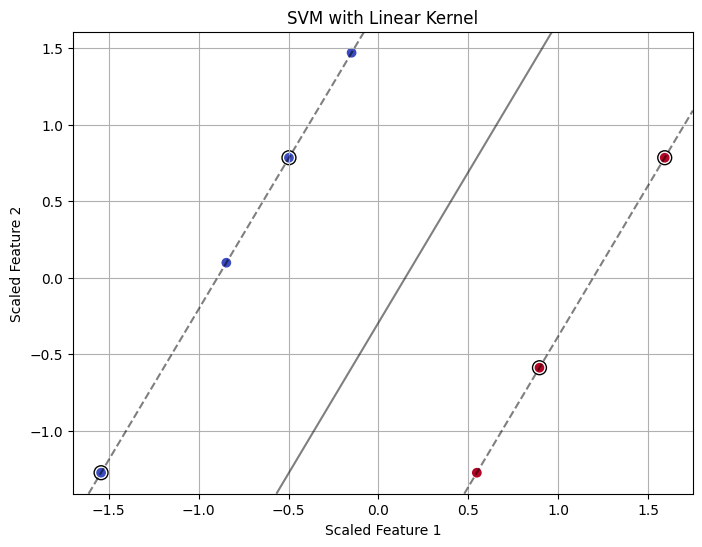

In [393]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Invented data: Two features and pollution level (0: Low, 1: High) - linearly separable
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 1], [7, 2], [8, 3], [9, 4], [10, 5]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 0: Low Pollution, 1: High Pollution

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear SVM classifier
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_linear.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot support vectors
ax.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], s=100,
           facecolors='none', edgecolors='k')

plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('SVM with Linear Kernel')
plt.grid(True)
plt.show()

This code demonstrates a linear SVM on linearly separable data. It trains the model and visualizes the data points along with the decision boundary and the margins defined by the support vectors, illustrating how the SVM aims to maximize the distance between the classes. Feature scaling is applied as it is important for SVM performance.

### Example 5: Support Vector Machine (SVM) with RBF Kernel

This example shows an SVM with a Radial Basis Function (RBF) kernel, demonstrating its ability to handle non-linearly separable data by implicitly mapping it to a higher dimension.

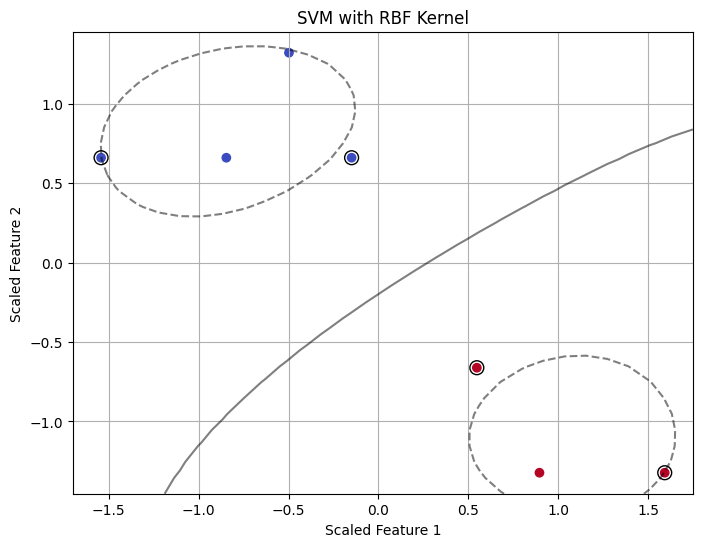

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Invented data: Two features and pollution level (0: Low, 1: High) - non-linearly separable
X = np.array([[1, 5], [2, 6], [3, 5], [4, 6], [5, 5], [6, 2], [7, 3], [8, 2], [9, 3], [10, 2]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 0: Low Pollution, 1: High Pollution


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an RBF Kernel SVM classifier
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_rbf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot support vectors
ax.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], s=100,
           facecolors='none', edgecolors='k')

plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('SVM with RBF Kernel')
plt.grid(True)
plt.show()

This code demonstrates an SVM with an RBF kernel on non-linearly separable data. It trains the model and visualizes the data points and the non-linear decision boundary, showcasing the RBF kernel's ability to find complex boundaries by mapping data to a higher dimension. Feature scaling is applied as it is important for SVM performance.